# Experimentally validating the DR methodology

In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir("/Users/jeandurand/Documents/Masters Thesis/causal_bayes_opt")

In [2]:
# Prepare the plot

def plot_everything(data):
    plt.figure(figsize=(12, 8))

    # Extract unique DAG types
    dag_types = set('_'.join(key.split('_')[:-1]) for key in data.keys())
    n_ints = sorted(set(int(key.split('_')[-1]) for key in data.keys()))

    for dag_type in dag_types:
        means = []
        stds = []
        for n_int in n_ints:
            key = f'{dag_type}_{n_int}'
            if key in data:
                means.append(data[key]['mean'])
                stds.append(data[key]['std'])
            else:
                means.append(None)
                stds.append(None)
        
        # Convert lists to numpy arrays for proper handling of None values
        means = np.array(means, dtype=np.float64)
        stds = np.array(stds, dtype=np.float64)

        plt.errorbar(n_ints, means, yerr=stds, label=dag_type, capsize=5, marker='o')

    # Customize the plot
    plt.xlabel('Number of Interventional Samples')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per DAG Type vs. Number of Interventional Samples')
    plt.legend()
    plt.grid(True)
    plt.show()

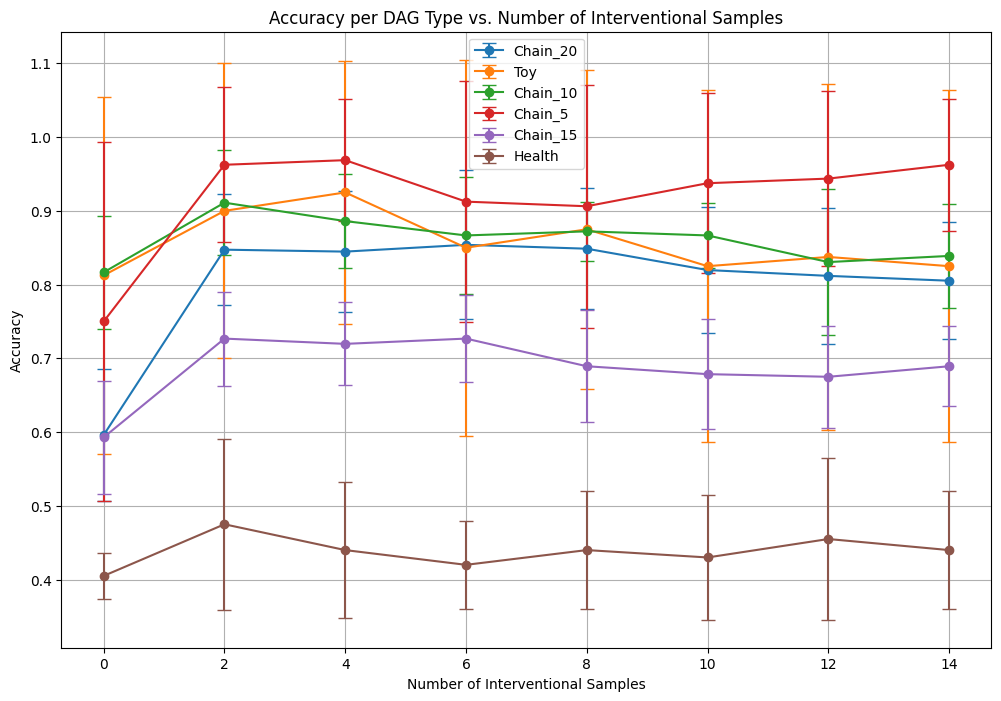

In [3]:
with open("results/dr_sweep/results_dict.pickle", "rb") as file:
    data = pickle.load(file)

plot_everything(data)

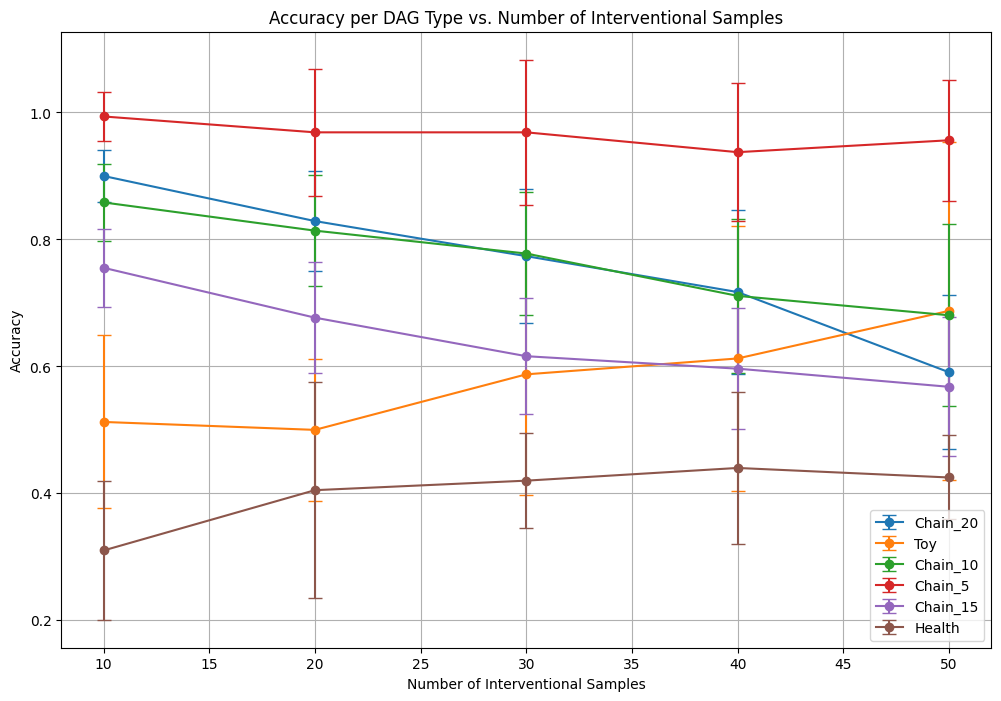

In [4]:
with open("results/dr_sweep/results_dict_int.pickle", "rb") as file:
    data = pickle.load(file)

plot_everything(data)

Taking interventional data does not help with accuracy. Maybe need to rethink the approach